In [60]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from scipy import stats
import math
from typing import List, Tuple, Any

In [ ]:
# Loading the arrays back
Distances = np.load('Distances.npy', allow_pickle=True)
#Cos_distances = np.load('Cos_distances.npy', allow_pickle=True)
Norms = np.load('Norms.npy', allow_pickle=True)


In [9]:
# Running the scripts
%run "c:/Users/Win10/Desktop/Magistrale/Tirocinio AI-Lab/STL_explainability/Test_distance_local_matrix.py"

# Runs in 1h if the parameters lists are all of len 10

The sum of the weights is: 2.4761257932937042e-08
The sum of squares of the weights is: 2.842737200447508e-17
n_e is: 21.567941665649414
n/n_e = 4.636511325836182
n_psi_added: 100, n_traj = 100, local_std = 1.0
Testing the norm of K_global: tensor([547.7100])
Testing the norm of K_cl: tensor([[360.5581]])
Testing the norm of K_imp: tensor([[419.1261]])
The mean distance is: 533.2471923828125
The mean cosine distance is : 0.929472029209137 

The sum of the weights is: 6.227504911748838e-08
The sum of squares of the weights is: 1.3952265826679751e-16
n_e is: 27.796072006225586
n/n_e = 3.597630500793457
n_psi_added: 100, n_traj = 100, local_std = 0.95
Testing the norm of K_global: tensor([547.7100])
Testing the norm of K_cl: tensor([[350.1631]])
Testing the norm of K_imp: tensor([[464.2473]])
The mean distance is: 503.9380187988281
The mean cosine distance is : 0.7410646080970764 

The sum of the weights is: 1.6718813355964812e-07
The sum of squares of the weights is: 9.144917099648169e-1

## Effect of the different parameters used on the kernels
The three parameters considered are:
1) The number of trajectories used
2) The number of formulae used (in particoular the number of forulae minus the number of trajectories)
3) The standard deviation of the distribution around the local trajectory

The euclidean and cosine distance between two tipe of kernels is measured:
1) Classical kernels obtained by sampling around a local trajectory
2) Kernels transformed using importance sampling (starting from global distribution)

The norms of the classical, global and importance sampling kernels measured with respect to the parameters considered

Regression Equation norm_global: y = -1.9078097535353718e-05x + 0.23579211829726895
R² Score: 0.0043
Regression Equation norm_classical: y = -0.00010979242783604245x + 0.28772867931922275
R² Score: 0.0076


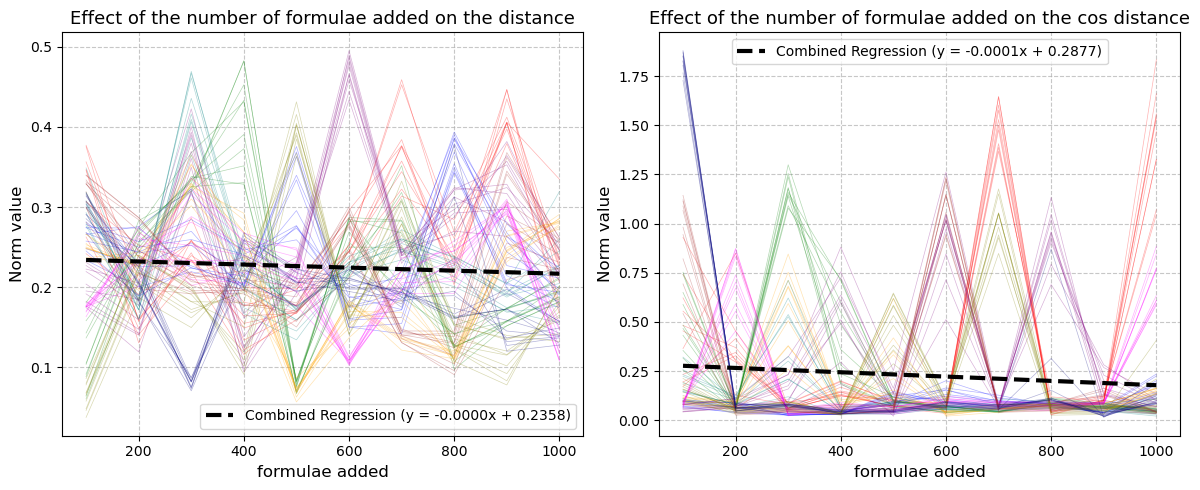

Regression Equation norm_global: y = -6.481496495053624e-05x + 0.26094739537561934
R² Score: 0.0491
Regression Equation norm_classical: y = -6.640888896855441e-05x + 0.26386774784326555
R² Score: 0.0028


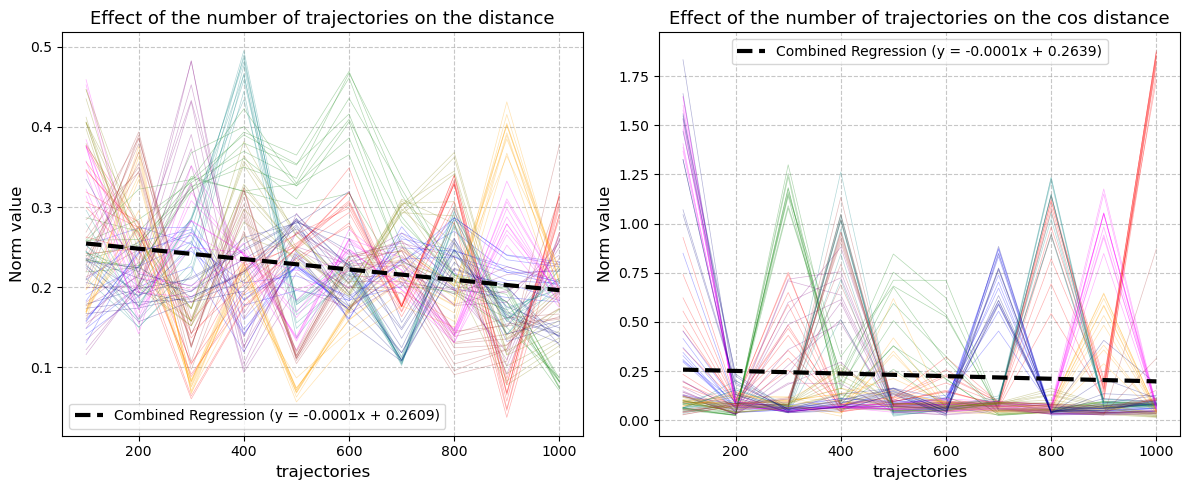

Regression Equation norm_global: y = 0.07461811214233874x + 0.1674701277425119
R² Score: 0.0163
Regression Equation norm_classical: y = 0.10865625605438681x + 0.14313424556724966
R² Score: 0.0019


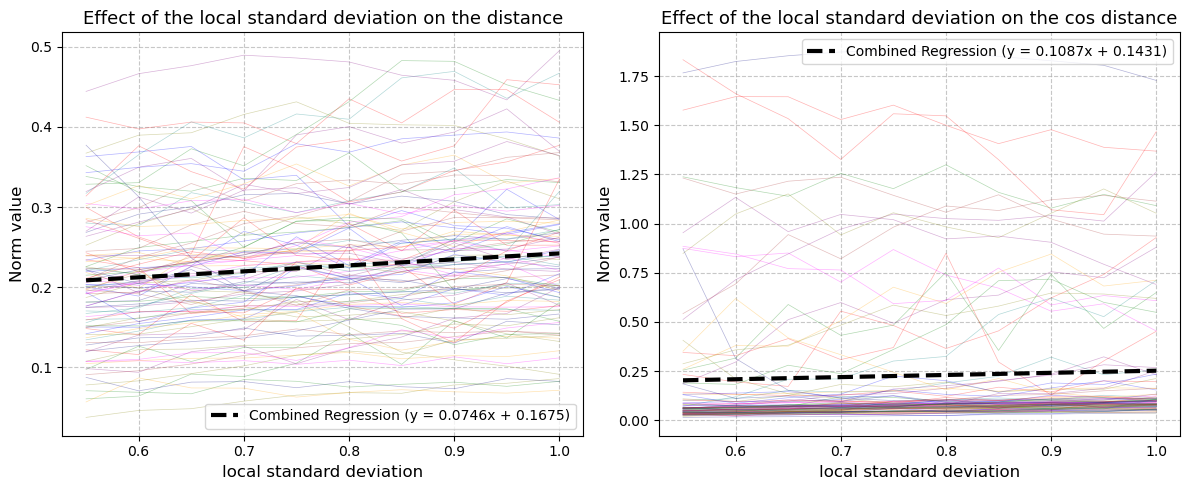

Regression Equation norm_global: y = 1.3014188561357136e-05x + 0.28977753489805047
R² Score: 0.0016
Regression Equation norm_classical: y = 9.270724054688905e-05x + 0.3568512942981863
R² Score: 0.0225
Regression Equation norm_imp: y = 2.4652868850205887e-05x + 0.44244358581821724
R² Score: 0.0010


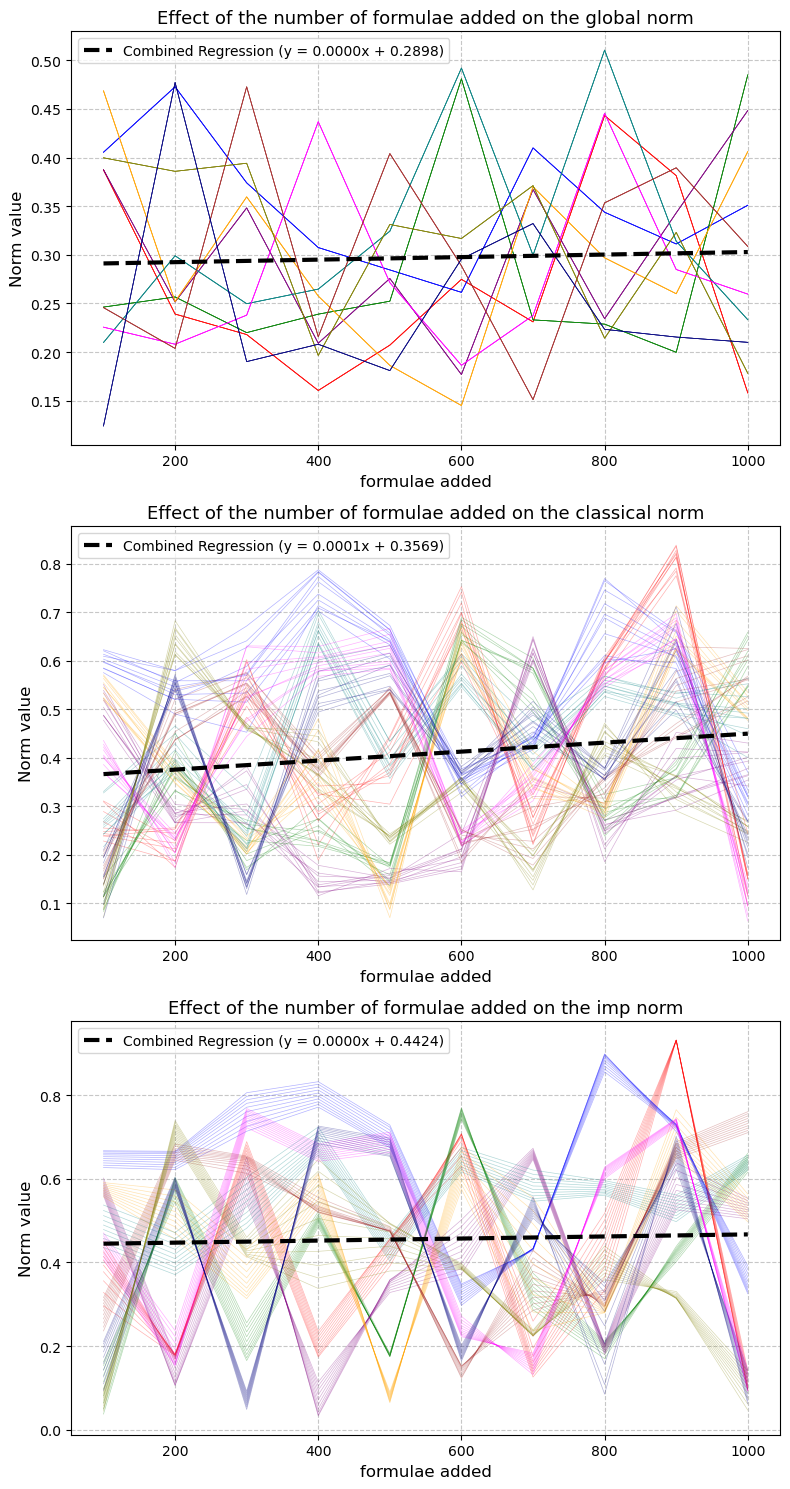

Regression Equation norm_global: y = -2.822078702087227e-05x + 0.3124567714682766
R² Score: 0.0075
Regression Equation norm_classical: y = -6.448607624669244e-05x + 0.4433076185346561
R² Score: 0.0109
Regression Equation norm_imp: y = -8.758276157412049e-05x + 0.5041731825515967
R² Score: 0.0131


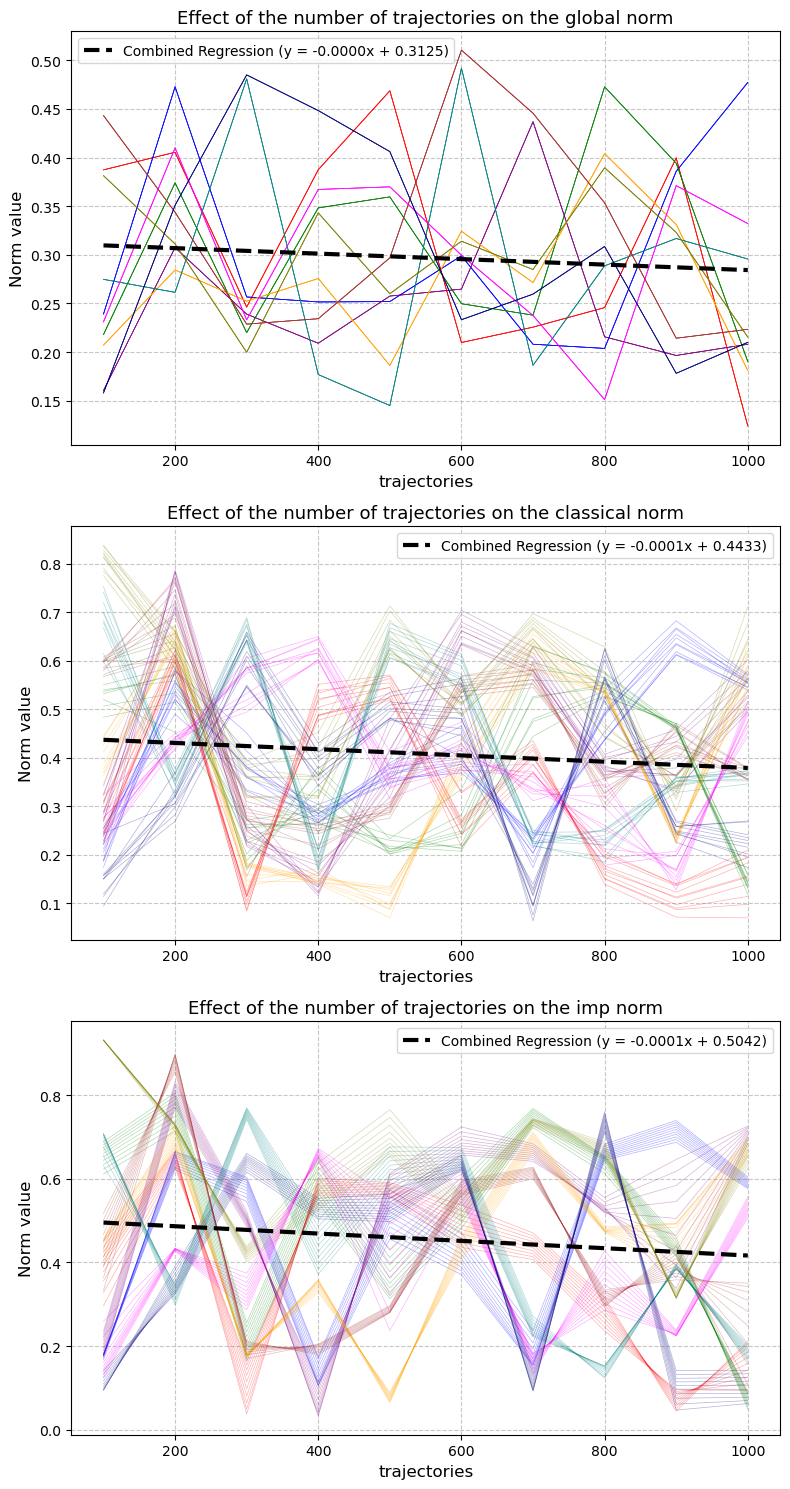

Regression Equation norm_global: y = 5.382899513334078e-18x + 0.2969353386067969
R² Score: 0.0000
Regression Equation norm_classical: y = -0.08318622285748352x + 0.47230959931352495
R² Score: 0.0045
Regression Equation norm_imp: y = -0.07953467080608752x + 0.5176420335605483
R² Score: 0.0027


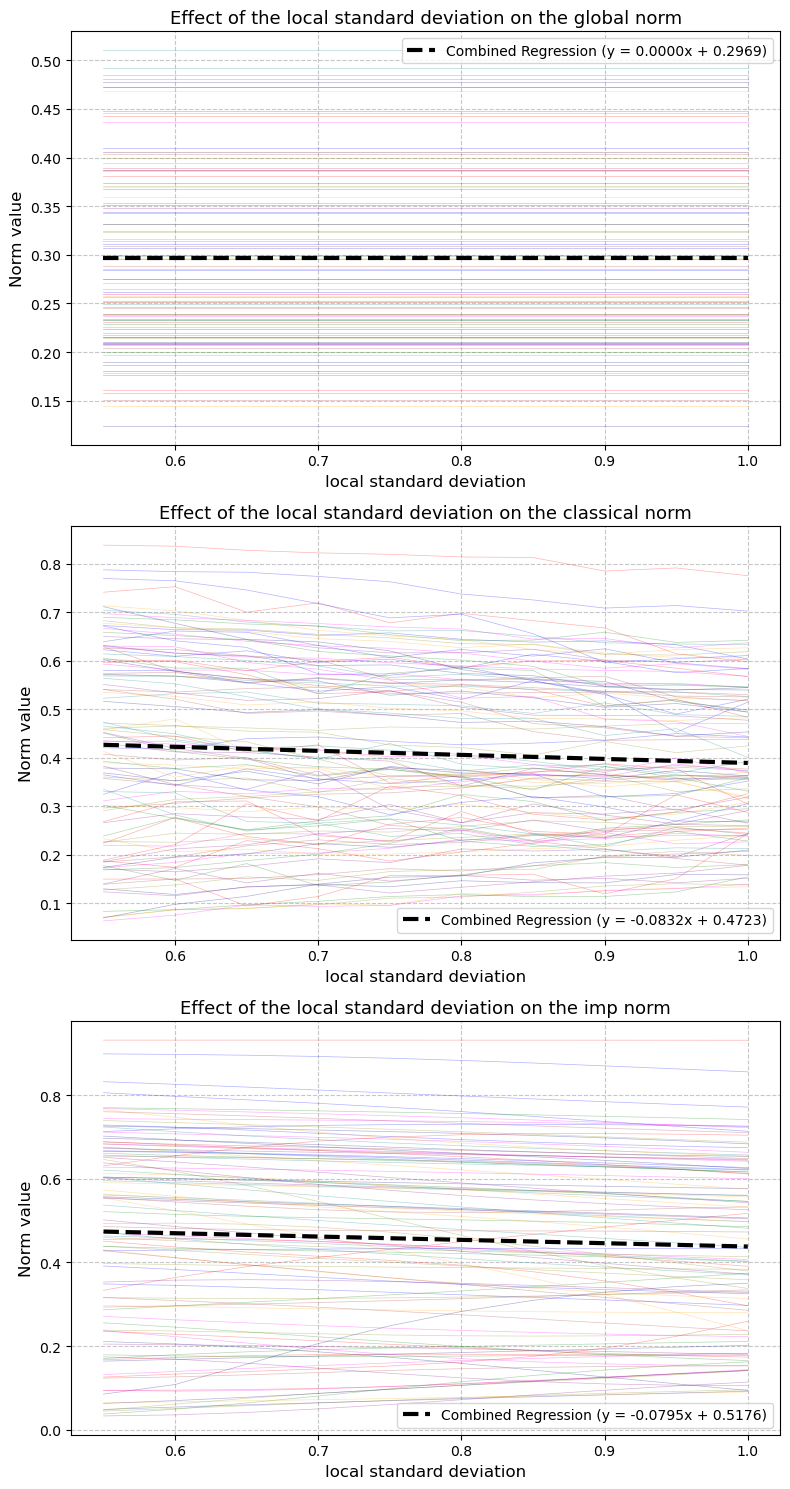

In [76]:
def plot_regression(data_array: np.ndarray,
                          parameter_index: int, 
                          var_index: int, 
                          ax: plt.Axes, 
                          title: str, 
                          colors: List[str]) -> Tuple[float, float, float]:
    """
    Plot individual datasets and perform regression.
    
    Args:
        data_array (np.ndarray): 3D array of data
        parameter_index (int): index of the parameter used on the x axis
        var_index (int): Index of the variable to plot
        ax (plt.Axes): Matplotlib axes to plot on
        title (str): Title for the plot
        colors (List[str]): List of colors for plotting
    
    Returns:
        Tuple of slope, intercept, and R-squared
    """

    # Store all points for combined regression
    x_points = []
    y_points = []

    # Different for loops depending on the parameter_index
    match parameter_index:
        case 0: # potting against the number of added formulae
            for idx2 in range(data_array.shape[1]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    x = [data_array[idx1, idx2, idx3][parameter_index] for idx1 in range(data_array.shape[parameter_index])]
                    y = [data_array[idx1, idx2, idx3][var_index] for idx1 in range(data_array.shape[parameter_index])]
        
                    ax.plot(x, y, 
                            color=colors[idx2], 
                            linewidth=0.5,
                            alpha=0.3)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 1: # plotting against the number of trajectories
            for idx1 in range(data_array.shape[0]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    x = [data_array[idx1, idx2, idx3][parameter_index] for idx2 in range(data_array.shape[parameter_index])]
                    y = [data_array[idx1, idx2, idx3][var_index] for idx2 in range(data_array.shape[parameter_index])]
                    
                    ax.plot(x, y, 
                            color=colors[idx1], 
                            linewidth=0.5,
                            alpha=0.3)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 2: # plotting against the standard deviation
            for idx1 in range(data_array.shape[0]):
                for idx2 in range(data_array.shape[1]):

                    # Creating the lists of points for the plot
                    x = [data_array[idx1, idx2, idx3][parameter_index] for idx3 in range(data_array.shape[2])]
                    y = [data_array[idx1, idx2, idx3][var_index] for idx3 in range(data_array.shape[2])]
                    
                    ax.plot(x, y, 
                            color=colors[idx2], 
                            linewidth=0.5,
                            alpha=0.3)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)
    
    # Convert to numpy arrays for regression
    x_array = np.array(x_points)
    y_array = np.array(y_points)
    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, y_array)
    
    # Regression line
    line_x = np.array([x_array.min(), x_array.max()]).reshape(-1, 1)
    line_y = slope * line_x + intercept
    
    ax.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')
    
    # Customize plot
    xlabels = ['formulae added', 'trajectories', 'local standard deviation']
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(xlabels[parameter_index], fontsize=12)
    ax.set_ylabel('Norm value', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return slope, intercept, r_value**2




def plotter(data: np.ndarray,
            parameter_index: int, 
            variable: str):
    """
    Create a comprehensive plot of different norms.
    
    Args:
        data (np.ndarray): 3D array containing the data
        parameter_index (int): index of the parameter used on the x axis
        variable (str): selects the plotting of the distances or the norms

    """
    # Colors for plotting
    colors = ['red', 'blue', 'green', 'purple', 'orange', 
              'teal', 'magenta', 'brown', 'olive', 'navy', 
              'coral', 'gold', 'indigo', 'lime', 'maroon']

    # Create figure and axes and various configurations for the plot
    xlabels = ['number of formulae added', 'number of trajectories', 'local standard deviation']
    if variable == "Distances":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the distance'), 
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the cos distance')
        ]
    elif variable == "Norms":
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the global norm'),
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the classical norm'),
            (5, ax3, f'Effect of the {xlabels[parameter_index]} on the importance sampling norm')
        ]

    # Plot each norm type
    regression_results = []
    for var_index, ax, title in configs:
        result = plot_regression(data, parameter_index, var_index, ax, title, colors)
        regression_results.append(result)
    
    # Print regression details
    labels = ['global', 'classical', 'imp']
    for label, (slope, intercept, r_squared) in zip(labels, regression_results):
        print(f"Regression Equation norm_{label}: y = {slope}x + {intercept}")
        print(f"R² Score: {r_squared:.4f}")
    
    plt.tight_layout()
    plt.show()


# Running the functions
for i in range(3):
    plotter(Distances, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms, parameter_index=i, variable="Norms")
